In [ ]:
from FraudDetector import Bank_Account_Fraud_Detection

In [ ]:
# Load Base.csv
fraud_detector = Bank_Account_Fraud_Detection('data/')
dataset = fraud_detector.load_data('Base')

## Important:
When using this dataset be careful that all your models/ metrics take care of the class imbalance in the dataset

In [ ]:
fraud_detector.preprocess(option='baseline', fet_eng=False)

0    988971
1     11029
Name: fraud_bool, dtype: int64

# Model Creation
## Baseline Models
Trying some baseline models to estimate a baseline score. Note that class-wheights are set for all the models to achieve higher predictive equality

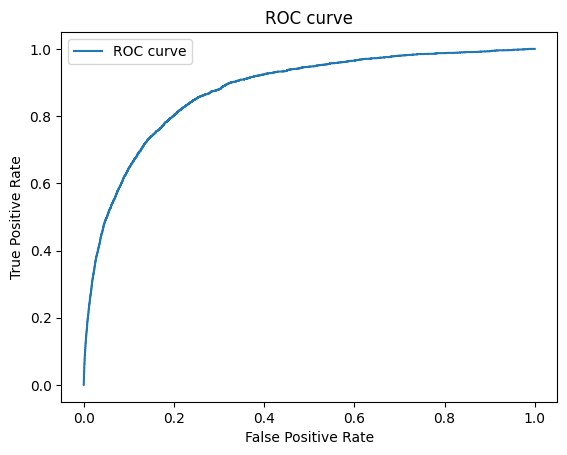

AUC: 0.8779388959897662
TPR:  49.69% 
FPR:  5.0% 
Threshold:  0.76
Predictive Equality:  89.52%


In [ ]:
_ = fraud_detector.fit_baseline('LR')

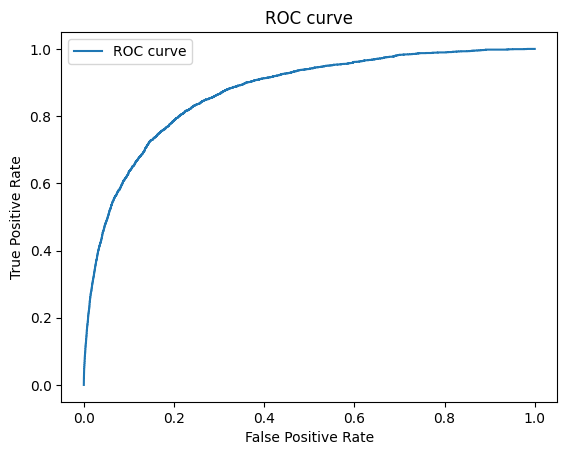

AUC: 0.8718540084797579
TPR:  48.78% 
FPR:  5.0% 
Threshold:  0.71
Predictive Equality:  74.38%


In [ ]:
_ = fraud_detector.fit_baseline('XGB')

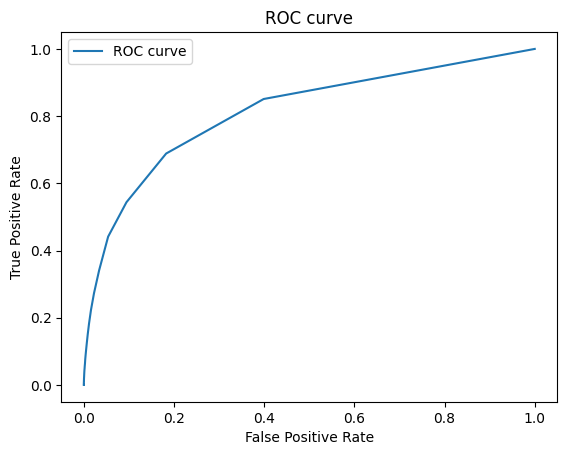

AUC: 0.8121777825660284
TPR:  34.050000000000004% 
FPR:  3.38% 
Threshold:  0.05
Predictive Equality:  33.650000000000006%


In [ ]:
_ = fraud_detector.fit_baseline('RF')

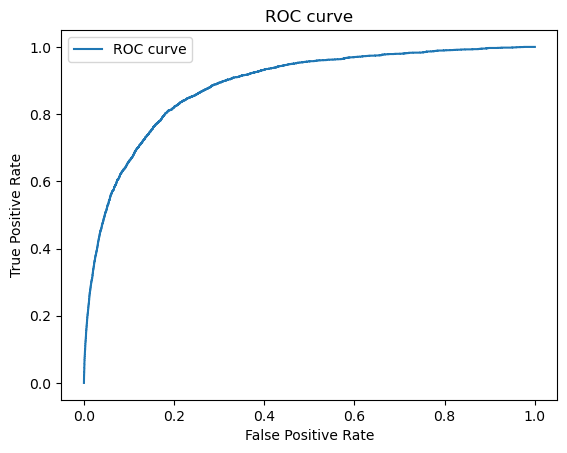

AUC: 0.8855174814254344
TPR:  51.53% 
FPR:  5.0% 
Threshold:  0.92
Predictive Equality:  44.72%


In [ ]:
_ = fraud_detector.fit_baseline('DNN')

# TODO
- Hyperparameter tuning for the models

### Random Search


#### 1st model

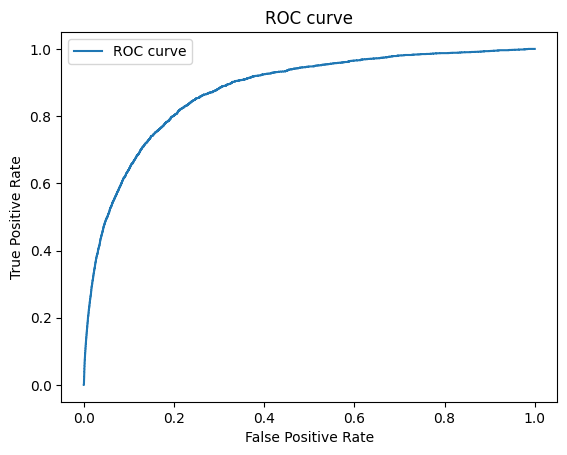

AUC: 0.8774444506942904
TPR:  49.44% 
FPR:  5.0% 
Threshold:  0.76
Predictive Equality:  89.12%


In [ ]:
_ = fraud_detector.tune_baseline_LR(
    C=[0.01, 0.1, 1, 10],
    penalty=['l1', 'l2', 'elasticnet'],
    solver=['lbfgs', 'saga', 'newton-cg', 'sag']
)

#### 2nd model

Best Hyperparameters: {'n_estimators': 1000, 'max_depth': 11, 'learning_rate': 0.2, 'gamma': 0.1}


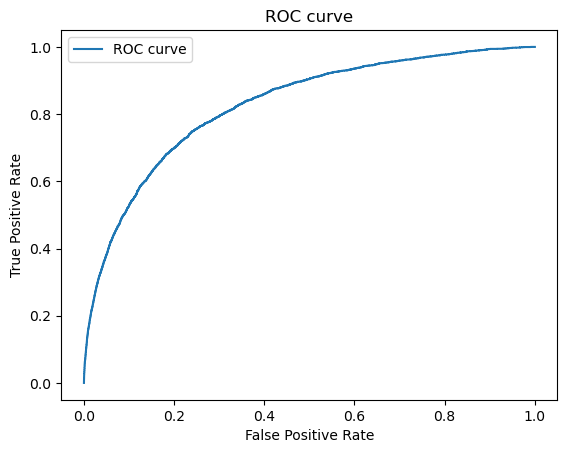

AUC: 0.8267344201471433
TPR:  38.190000000000005% 
FPR:  5.0% 
Threshold:  0.01
Predictive Equality:  97.49%


In [ ]:
_ = fraud_detector.tune_baseline_XGB(
    n_estimators=[100, 500, 1000],
    max_depth=[ 5,7,9,11],
    learning_rate=[0.01, 0.05, 0.1, 0.2],
    gamma=[0.1, 0.5, 1, 3]
)

#### 3rd model

Best Hyperparameters: {'n_estimators': 500, 'max_features': 'sqrt', 'max_depth': 5}


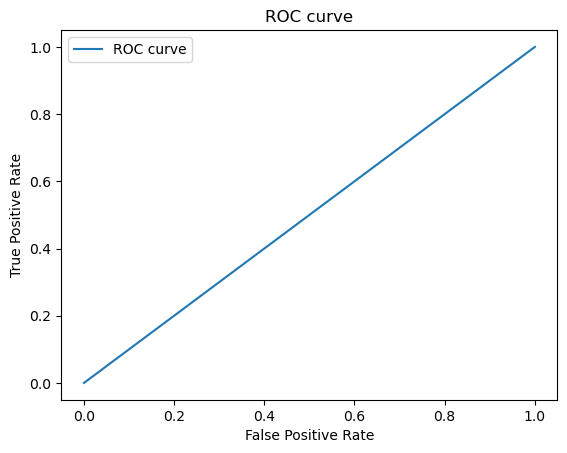

AUC: 0.5
TPR:  0.0% 
FPR:  0.0% 
Threshold:  1
Predictive Equality:  100.0%


In [ ]:
_ = fraud_detector.tune_basline_RF(
    n_estimators=[100, 500],
    max_depth=[2, 5, 10],
    max_features=['sqrt', 'log2']
)

#### 4th model

#### First Trial

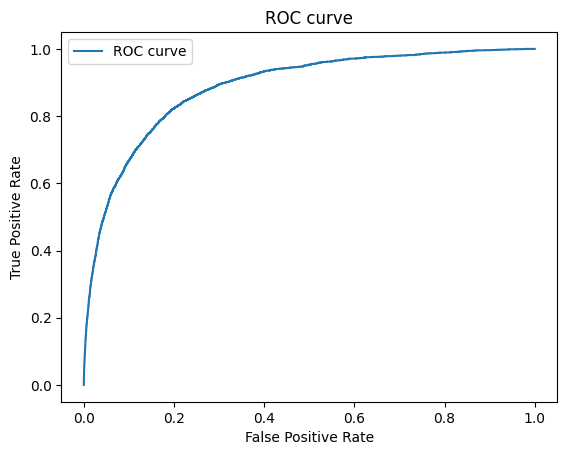

AUC: 0.8867058300982358
TPR:  52.35999999999999% 
FPR:  5.0% 
Threshold:  0.95
Predictive Equality:  82.41000000000001%


In [ ]:
_ = fraud_detector.tune_baseline_DNN(
    dropout_rate=[0.3, 0.4, 0.5],
    neurons=[64, 128, 256],
    learning_rate=[1e-2, 1e-3, 1e-4]
)

#### second Trial

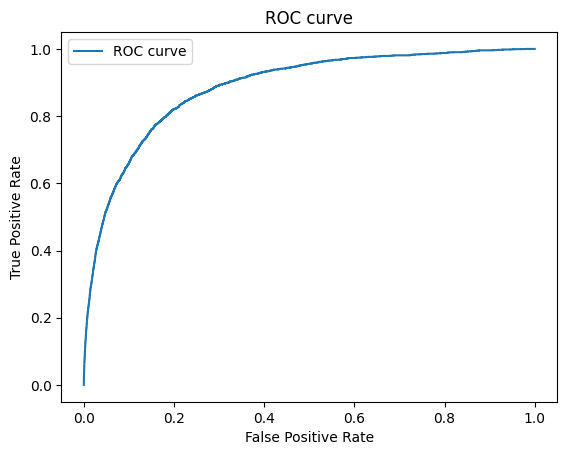

AUC: 0.8858307457429337
TPR:  51.980000000000004% 
FPR:  4.99% 
Threshold:  0.92
Predictive Equality:  82.71%


In [ ]:
_ = fraud_detector.tune_baseline_DNN(
    dropout_rate=[0.3, 0.4, 0.5],
    neurons=[64, 128, 256],
    learning_rate=[1e-2, 1e-3, 1e-4]
)

#### Third Trial

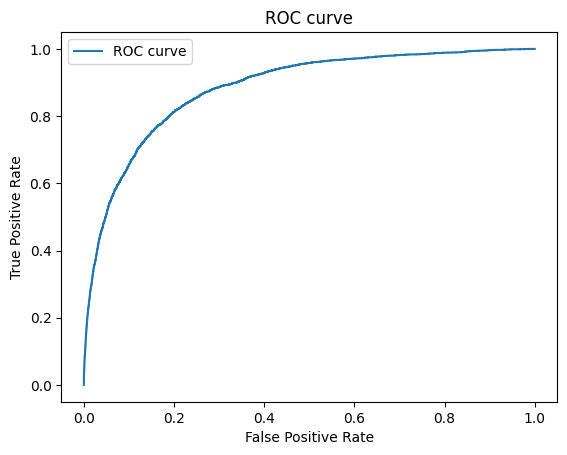

AUC: 0.8836090320498389
TPR:  50.73% 
FPR:  4.99% 
Threshold:  0.9
Predictive Equality:  86.66%


In [ ]:
_ = fraud_detector.train_DNN(dropout_rate=0.4, neurons=256, learning_rate=0.01)

#### Forth Trial

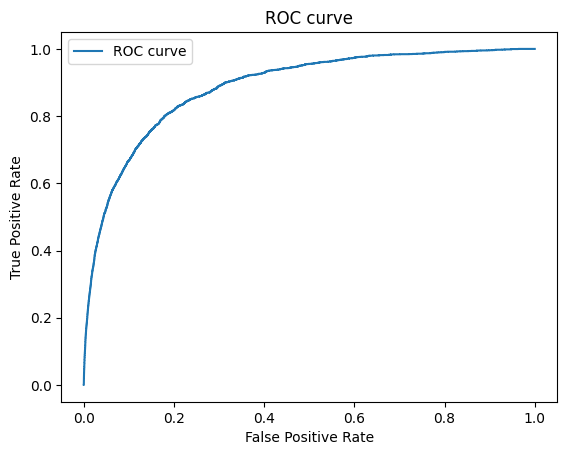

AUC: 0.8870453811284031
TPR:  52.56999999999999% 
FPR:  4.9799999999999995% 
Threshold:  0.9
Predictive Equality:  95.61%


In [ ]:
_ = fraud_detector.train_DNN(dropout_rate=0.2, neurons=256, learning_rate=0.01)

#### Fifth Trial

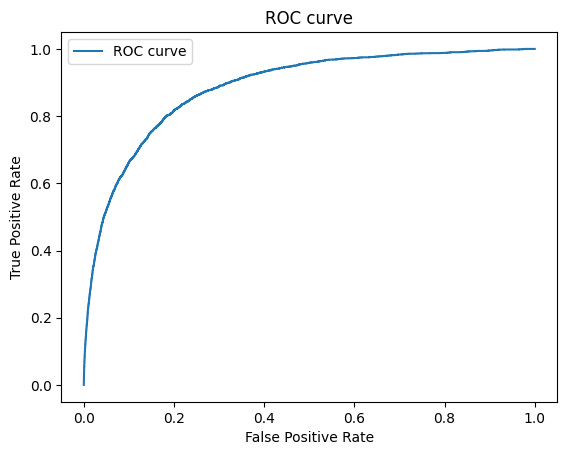

AUC: 0.8859457535488257
TPR:  51.980000000000004% 
FPR:  4.9799999999999995% 
Threshold:  0.98
Predictive Equality:  97.81%


In [ ]:
_ = fraud_detector.train_DNN(dropout_rate=0.4, neurons=512, learning_rate=0.01)

#### sixth Trial

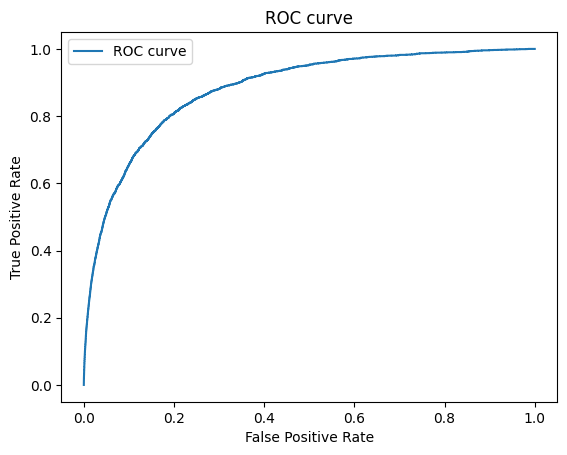

AUC: 0.8817267146782964
TPR:  51.11% 
FPR:  5.0% 
Threshold:  0.95
Predictive Equality:  90.25%


In [ ]:
_ = fraud_detector.train_DNN(dropout_rate=0.4, neurons=512, learning_rate=0.05)

#### seventh trial

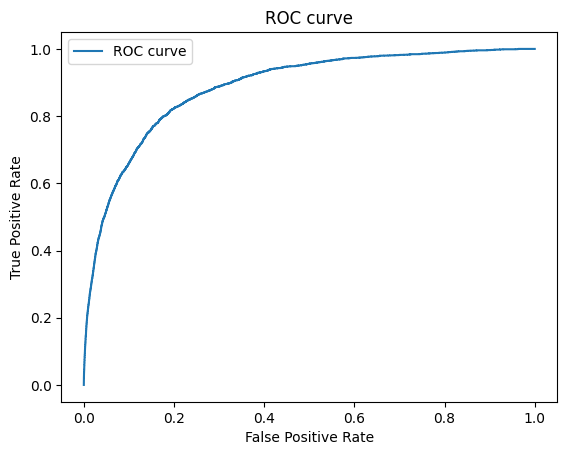

AUC: 0.88680877063216
TPR:  51.910000000000004% 
FPR:  4.97% 
Threshold:  0.92
Predictive Equality:  86.59%


In [ ]:
_ = train_DNN(dropout_rate=0.5, neurons=128, learning_rate=0.01)

### tunning trials

> This trial is based on my understanding of the effect of the model hyperparameters and trying to tune the model by myself by trying many values and seeing the effect of it. I'll leave the best hyperparameters that got better results than the basic model.

#### XGB

In [ ]:
_ = fraud_detector.train_XGB(
    tree_method='gpu_hist', gpu_id=0,
    scale_pos_weight=89.67005,
    n_estimators = 800,
    learning_rate = 0.05,
    max_depth = 6,
    gamma = 0.15,
    subsample = 0.7
)

* n_estimators:I used a relatively large value to allow the model to learn complex patterns and reduce overfitting.
* learning_rate:a small learning rate to control the step size during training this can improve the model's generalization.
* max_depth: moderate value to avoid overfitting.
* gamma: small positive value to encourage pruning of tree branches. It helps control overfitting.
* subsample: a value less than 1.0  to introduce randomness and prevent overfitting.

#### RandomForestClassifier

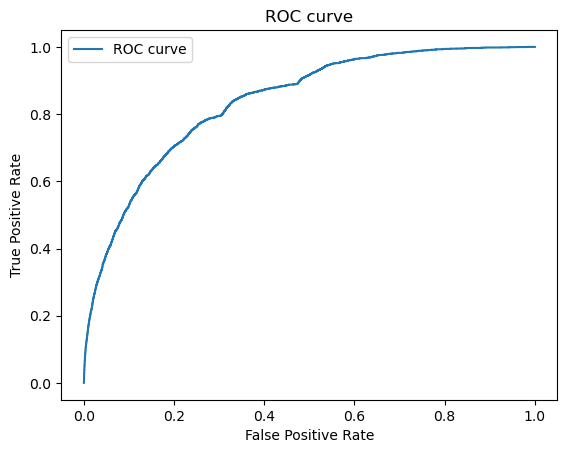

AUC: 0.8379610948882703
TPR:  38.36% 
FPR:  4.9799999999999995% 
Threshold:  0.03
Predictive Equality:  94.61%


In [ ]:
_ = fraud_detector.train_RF(class_weight={0:89.67005,1:10.32995},
                                  n_estimators = 500,
                                  criterion = 'gini',
                                  max_depth = 15, n_jobs= -1
                                 )

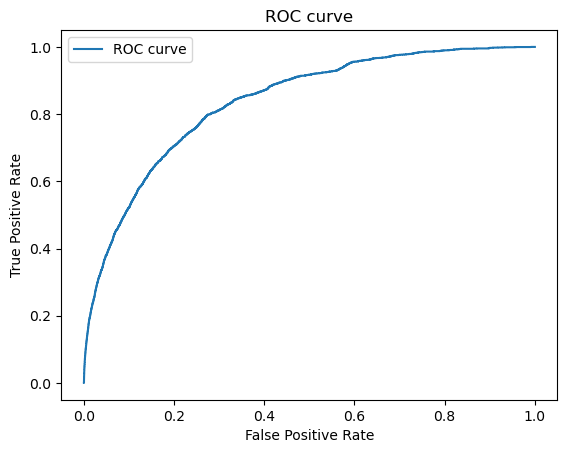

AUC: 0.8366230114824699
TPR:  38.05% 
FPR:  4.99% 
Threshold:  0.02
Predictive Equality:  94.71000000000001%


In [ ]:
_ = fraud_detector.train_RF(class_weight={0:89.67005,1:10.32995},
                                  n_estimators = 800,
                                  criterion = 'gini',
                                  max_depth = 15, n_jobs= -1
                                 )

In [ ]:
AUC: 0.8125935301675457
TPR:  34.949999999999996%
FPR:  3.4099999999999997%
Threshold:  0.05
Predictive Equality:  95.67%

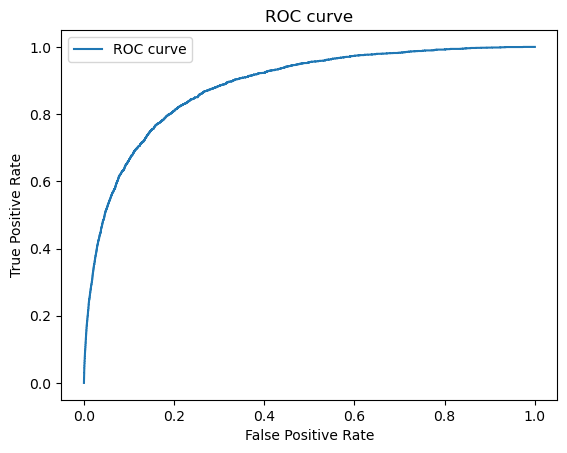

AUC: 0.8841258946236236
TPR:  51.739999999999995% 
FPR:  5.0% 
Threshold:  0.16
Predictive Equality:  75.44%


In [ ]:
_ = fraud_detector.train_RF(class_weight={0:10.32995,1: 89.67005},
                                  n_estimators = 800,
                                  criterion = 'entropy',
                                  max_depth = 15, n_jobs= -1
                                 )

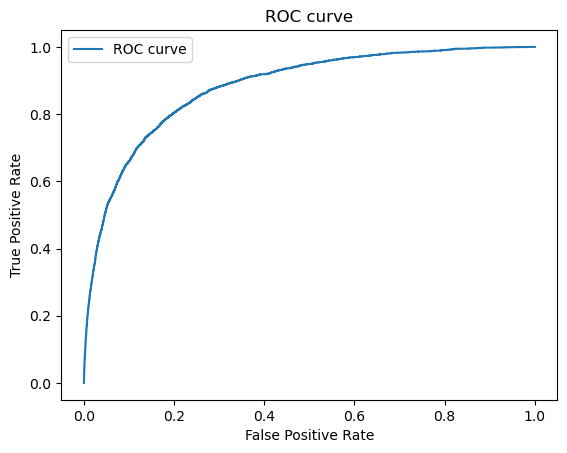

AUC: 0.8813568441975642
TPR:  51.980000000000004% 
FPR:  4.99% 
Threshold:  0.15
Predictive Equality:  73.32%


In [ ]:
_ = fraud_detector.train_RF(class_weight={0:10.32995,1: 89.67005},
                                  n_estimators = 500, #800
                                  criterion = 'gini',
                                  max_depth = 15, n_jobs= -1
                                 )

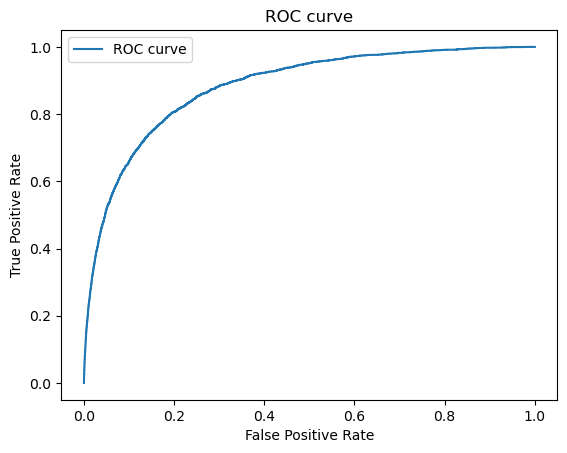

AUC: 0.8821565536561604
TPR:  51.6% 
FPR:  4.99% 
Threshold:  0.15
Predictive Equality:  72.87%


In [ ]:
_ = fraud_detector.train_RF(class_weight={0:10.32995,1: 89.67005},
                                  n_estimators = 800, #800
                                  criterion = 'gini',
                                  max_depth = 15, n_jobs= -1
                                 )